# Homework 3

In [106]:
import pyspark as ps
import random
import pandas as pd

1. Import pyspark into your notebook and create a new appName as “Homework 3"


In [107]:
spark = ps.sql.SparkSession.builder\
            .appName('Homework 3')\
            .getOrCreate()

#.master('local')\

In [108]:
sc = spark.sparkContext

2. The simulation process:
    - Rather than a single 2-sided coin, there are two 6-sided dice.
    - When the dice are rolled, their outcomes should be added together.
    - The dice should be rolled 100 times
    

In [119]:
#random.seed(30)
n = 100

def dice(n):
    return [(f"{i}", random.randint(1, 6) + random.randint(1, 6)) for i in range(1,n+1)]



rdd = sc.parallelize(dice(n))
print(rdd.collect())


[('1', 8), ('2', 7), ('3', 11), ('4', 8), ('5', 8), ('6', 8), ('7', 7), ('8', 5), ('9', 7), ('10', 8), ('11', 10), ('12', 4), ('13', 5), ('14', 7), ('15', 9), ('16', 7), ('17', 4), ('18', 7), ('19', 5), ('20', 7), ('21', 10), ('22', 4), ('23', 7), ('24', 7), ('25', 7), ('26', 5), ('27', 10), ('28', 6), ('29', 5), ('30', 3), ('31', 11), ('32', 9), ('33', 7), ('34', 3), ('35', 5), ('36', 8), ('37', 6), ('38', 4), ('39', 7), ('40', 7), ('41', 10), ('42', 10), ('43', 5), ('44', 8), ('45', 3), ('46', 6), ('47', 6), ('48', 2), ('49', 9), ('50', 5), ('51', 6), ('52', 10), ('53', 9), ('54', 9), ('55', 3), ('56', 10), ('57', 7), ('58', 7), ('59', 9), ('60', 6), ('61', 5), ('62', 5), ('63', 2), ('64', 10), ('65', 10), ('66', 7), ('67', 8), ('68', 7), ('69', 2), ('70', 10), ('71', 6), ('72', 4), ('73', 6), ('74', 9), ('75', 10), ('76', 7), ('77', 12), ('78', 7), ('79', 9), ('80', 5), ('81', 4), ('82', 7), ('83', 7), ('84', 3), ('85', 8), ('86', 11), ('87', 10), ('88', 7), ('89', 4), ('90', 7), ('

3. Collection into a data.frame

In [120]:
rollDiceDF = pd.DataFrame(rdd.collect())\
                .rename(columns={0:"rolls",1:"results"})
rollDiceDF.head()

rolls  results
0     1        8
1     2        7
2     3       11
3     4        8
4     5        8

4. Histogram

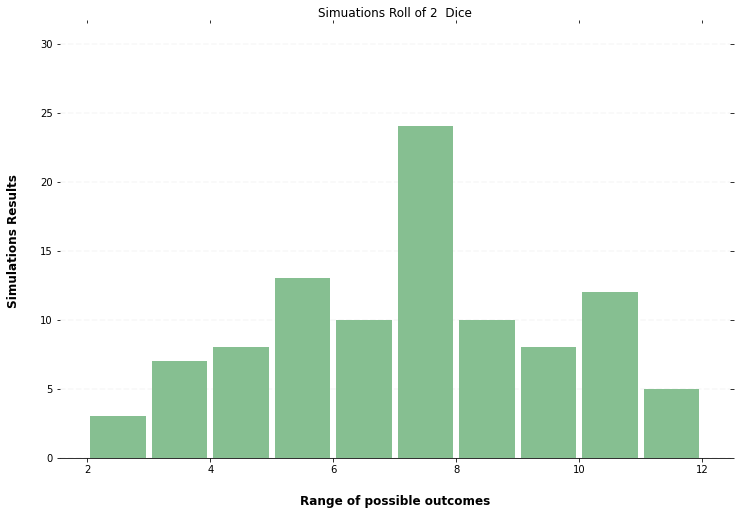

In [146]:
ax = rollDiceDF.hist(grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]



for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Simuations Roll of 2  Dice")

    # Set x-axis label
    x.set_xlabel("Range of possible outcomes", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Simulations Results", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

---